# Model selection, XGBoost original data set

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [2]:
dataset = pd.read_csv('germany_housing_data_14.07.2020.csv')
X = dataset.iloc[:, 2:]
y = dataset.iloc[:, 1]
dataset.head()

,Unnamed: 0,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,...,Energy_source,Energy_certificate,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype
0,0,498000.0,Multiple dwelling,106.00,229.0,NaN,01.10.2020,5.5,3.0,1.0,...,Gas,available,demand certificate,NaN,D,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot
1,1,495000.0,Mid-terrace house,140.93,517.0,20.00,01.01.2021,6.0,3.0,2.0,...,NaN,not required by law,NaN,NaN,NaN,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot
2,2,749000.0,Farmhouse,162.89,82.0,37.62,01.07.2020,5.0,3.0,2.0,...,"Fernwärme, Bioenergie",available,demand certificate,NaN,B,Baden-Württemberg,Esslingen (Kreis),Ostfildern,1.0,Garage
3,3,259000.0,Farmhouse,140.00,814.0,NaN,nach Vereinbarung,4.0,NaN,2.0,...,Strom,available,demand certificate,NaN,G,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage
4,4,469000.0,Multiple dwelling,115.00,244.0,NaN,sofort,4.5,2.0,1.0,...,Öl,available,demand certificate,NaN,F,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage


## Encoding categorical data

We can see below, that the column numbers 9 - 14 have categorical data and must be one hot encoded

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10552 entries, 0 to 10551
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10552 non-null  int64  
 1   Price                    10552 non-null  float64
 2   Type                     10150 non-null  object 
 3   Living_space             10552 non-null  float64
 4   Lot                      10552 non-null  float64
 5   Usable_area              5568 non-null   float64
 6   Free_of_Relation         6983 non-null   object 
 7   Rooms                    10552 non-null  float64
 8   Bedrooms                 6878 non-null   float64
 9   Bathrooms                8751 non-null   float64
 10  Floors                   7888 non-null   float64
 11  Year_built               9858 non-null   float64
 12  Furnishing_quality       7826 non-null   object 
 13  Year_renovated           5349 non-null   float64
 14  Condition             

### The onehot encoding of the columns

In [4]:
X = pd.get_dummies(X)
X.head(10)

,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Energy_consumption,...,Place_Ückendorf,Place_Ückesdorf,Place_Ürzig,Garagetype_Car park lot,Garagetype_Carport,Garagetype_Duplex lot,Garagetype_Garage,Garagetype_Outside parking lot,Garagetype_Parking lot,Garagetype_Underground parking lot
0,106.00,229.0,NaN,5.5,3.0,1.0,2.0,2005.0,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,140.93,517.0,20.00,6.0,3.0,2.0,NaN,1994.0,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,162.89,82.0,37.62,5.0,3.0,2.0,4.0,2013.0,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
3,140.00,814.0,NaN,4.0,NaN,2.0,2.0,1900.0,2000.0,NaN,...,0,0,0,0,0,0,1,0,0,0
4,115.00,244.0,NaN,4.5,2.0,1.0,NaN,1968.0,2019.0,NaN,...,0,0,0,0,0,0,1,0,0,0
5,310.00,860.0,100.00,8.0,NaN,NaN,3.0,1969.0,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
6,502.00,5300.0,163.16,13.0,NaN,4.0,NaN,2004.0,NaN,35.9,...,0,0,0,0,0,0,0,0,1,0
7,263.00,406.0,118.00,10.0,NaN,NaN,3.0,1989.0,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
8,227.00,973.0,83.00,10.0,4.0,4.0,2.0,1809.0,2015.0,183.1,...,0,0,0,0,0,0,0,0,1,0
9,787.00,933.0,NaN,30.0,NaN,NaN,3.0,1920.0,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0


In [5]:
X = X.values
y = y.values

### The result of each model will be added to this list

In [6]:
results_r2 = []

# Model: XGBoost regression

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

## Training the XGBoost regression model 

In [8]:
from xgboost import XGBRegressor
#seed = 0 is default
regressor = XGBRegressor(seed = 0)
regressor.fit(X_train, y_train)

[13:36:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(seed=0)

## Predicting the Test set results

In [9]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[677187.19 630000.  ]
 [418933.78 360000.  ]
 [385846.41 209000.  ]
 ...
 [545446.75 479000.  ]
 [308815.09 315000.  ]
 [701730.5  285000.  ]]


## Evaluating the Model Performance

In [10]:
from sklearn.metrics import r2_score
results_r2.append(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred))


0.5652025890094451


## Evaluating the Model Performance

In [11]:
from sklearn.metrics import r2_score
results_r2.append(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.5652025890094451


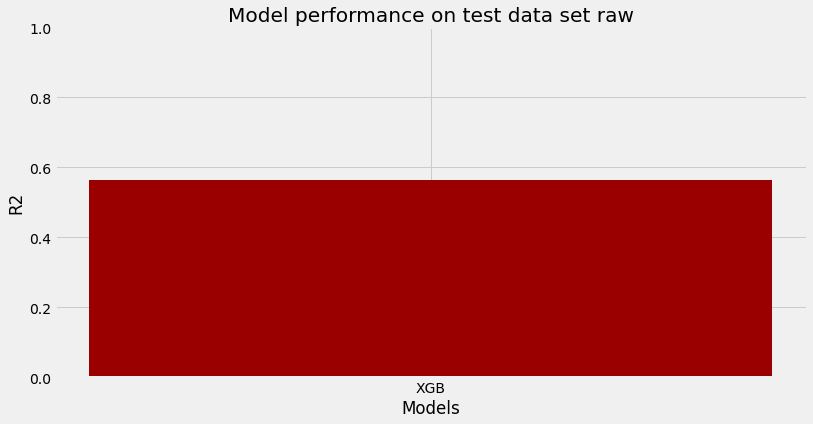

In [12]:
import matplotlib.cm as cm
from numpy.random import rand

# get a color map
cmap = cm.get_cmap('jet')
# 5 nbrs 0 - 1 in array
my_colors = rand(5)

plt.style.use('fivethirtyeight')
plt.figure(figsize =(12,6))

models = np.array(["XGB"])

plt.bar(models, results_r2, color = cmap(my_colors))
plt.xlabel("Models")
plt.ylabel("R2")
plt.title("Model performance on test data set raw")
plt.ylim(0.0, 1)
plt.show()